<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/Machete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHETE

In [ ]:
# Autor: Andres Montes de Oca

# Instalacion de Paquetes
!pip install pingouin
# !pip install scipy
# !pip install statsmodels


# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt


# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## R Magic in Google Colab
## IN PROGRESS

In [ ]:
# # Version rpy2 que no tiene problemas de compatibilidad
# !pip install rpy2==3.5.1

# # activate R magic
# %load_ext rpy2.ipython

# # Import rpy2 for dataframe conversion
# import rpy2.robjects as ro
# from rpy2.robjects.packages import importr
# from rpy2.robjects import pandas2ri
# from rpy2.robjects.conversion import localconverter
# from rpy2.robjects import globalenv

# # Cargamos un DataSet cualquira en Python, para que no de error
# df_Python = sns.load_dataset('iris')

# # Convert the python dataframe to the R dataframe
# with localconverter(ro.default_converter + pandas2ri.converter):
#   df_R = ro.conversion.py2rpy(df_Python)

# globalenv['df_R'] = df_R # Create a variable name in R's global environment

# # Convert R Dataframe to python dataframe
# with localconverter(ro.default_converter + pandas2ri.converter):
#   df_Python = ro.conversion.rpy2py(df_R)

## Cargas de Datasets from Google Drive

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float

# Peso, Edad, Colesterol son Modelo Lineal
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
# Modelo Lineal para ejemplos
dataP = sm.add_constant(dataP)
model_colest = smf.ols('colest ~ edad', data=dataP).fit()

# Cars con Modelo Lineal
id = '15pf-6P4Ek2rp6mYmfOybHRqAxqOoTp6i'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('cars.csv')
dataC = pd.read_csv('cars.csv')
model_cars = smf.ols('dist ~ speed', data=dataC).fit()


# University
id = '16kLQNXhyweAi38xR2IeQCCagVcU725UZ'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('University.csv')
dataU = pd.read_csv('University.csv')

# Iris
dataI = sns.load_dataset('iris')

#### Logbook

In [ ]:
# 31/05/23 -> Creacion de la Notebook
# 31/05/23 -> 1, 2, 3, 4, 5
# 06/06/23 -> 6 - Correlacion de Residuos
# 17/06/23 -> 7 - Transfomraciones Box Clox
# 19/06/23 -> Migrated to Google Colab and R Magic Enabled

## Machete

### 1) Linear Relationship
Relationship between independent var (x) and depedent var (y) is linear

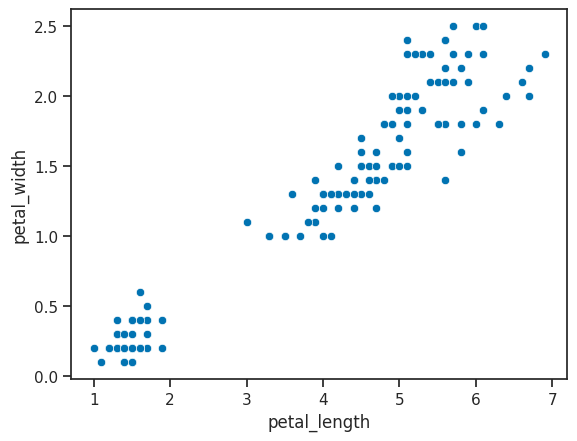

In [ ]:
sns.scatterplot(data=dataI, x='petal_length', y='petal_width')
plt.show()

# Transformmations for making relationships linear. Polynomial or Exponential for any of both

### 2) Multicollonearity
Eeach independent variable should be independent from other independent variables

,n,r,CI95%,p-val,BF10,power
pearson,150,0.962865,"[0.95, 0.97]",4.675004e-86,1.113e+82,1.0


<ipython-input-18-eeee81c019ac>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  display(sns.heatmap(dataI.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)) # Todos contra todos


<Axes: >

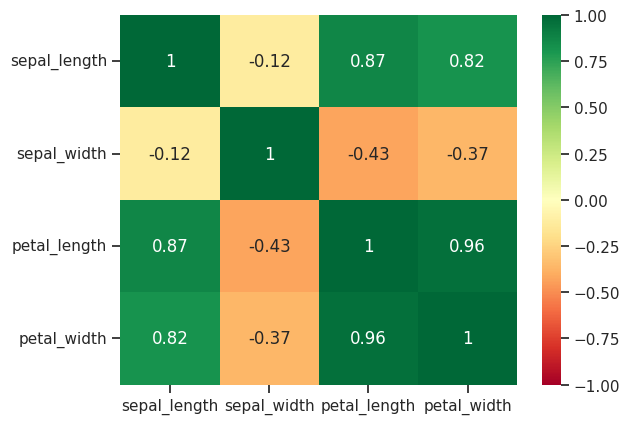

In [ ]:
display(pg.corr(dataI['petal_length'], dataI['petal_width'], method='pearson')) # Entre dos varibales, H0 -> Variables Independientes
display(sns.heatmap(dataI.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True)) # Todos contra todos

### 3) Bi-Variate Normality
Multivariate Normality in Variables

HZResults(hz=2.3363942003154383, pval=4.141311629927849e-19, normal=False)


,W,pval,normal
sepal_width,0.984917,0.101126,True


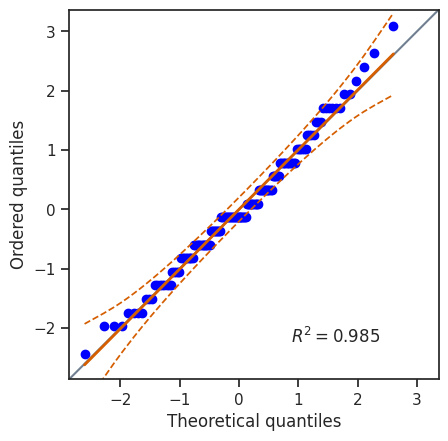

In [ ]:
# Test analitico para Multi
print(pg.multivariate_normality(dataI.drop(columns='species'))) # Henze-Zirkler Test, H0 -> Multiv Normal Dist


# Tests analiticos para Single
display(pg.normality(dataI['sepal_width'])) # Shapiro Test(single Var), H0 -> Normal Dist

# Otros tests
# sm.stats.diagnostic.normal_ad(dataI['sepal_width']) # Anderson-Darling StatsModels
# st.anderson(dataI['sepal_width'], dist='norm') # Anderson-Darling SciPy
# st.kstest(dataI['sepal_width'], 'norm')# Kolmogorov-Smirnov SciPy

# Test grafico para Single
pg.qqplot(dataI['sepal_width']) # QQ Plot
plt.show()

### 4) Residuals Normality With 0 Mean
Model residuals should follow a normal distribution, with 0 as mean

In [ ]:
# Primero hay que generar el Modelo de Regresion Lineal
display(pg.normality(model_colest.resid))
print('Mean:', model_colest.resid.mean())

# If distribution is not normal, regression results will be biased
# and it may highlight that there are outliers or other assumptions being violated

,W,pval,normal
0,0.964775,0.517479,True


Mean: 5.0022208597511053e-14


### 5) Residuals Variance (Homosedasticity)
The variance of residual is the same for any value of x

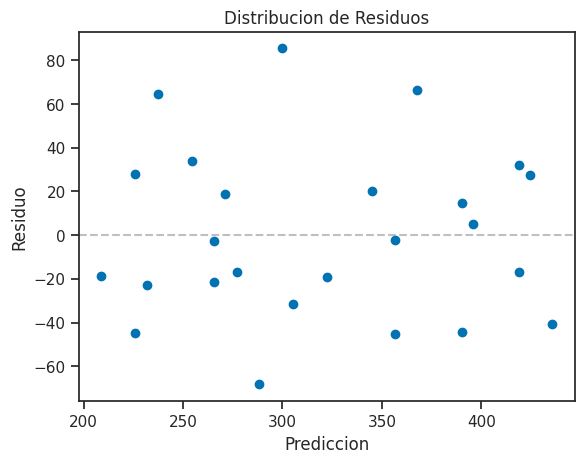

Estadistico BP y p-value: 0.15820998430559063 0.6908099159134585


In [ ]:
# Analsis grafico a mano usando Matplotlib
plt.scatter(x=model_colest.predict(), y=model_colest.resid)
plt.xlabel( 'Prediccion')
plt.ylabel('Residuo')
plt.title('Distribucion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura de embudo

# Analitico (Breusch-Pagan Test) -> H0: Residuos Homocedasticos
BP, p_value, _, _ =sm.stats.het_breuschpagan(model_colest.resid, model_colest.model.exog)
print('Estadistico BP y p-value:', BP, p_value)

# sns.residplot(data=dataP, x='edad', y='colest', lowess=True) # Pending
# Test White, Goldfeld-Quandt  Pending

### 6) Correlacion de Residuos
Aleatoriedad en el orden de las observacioens

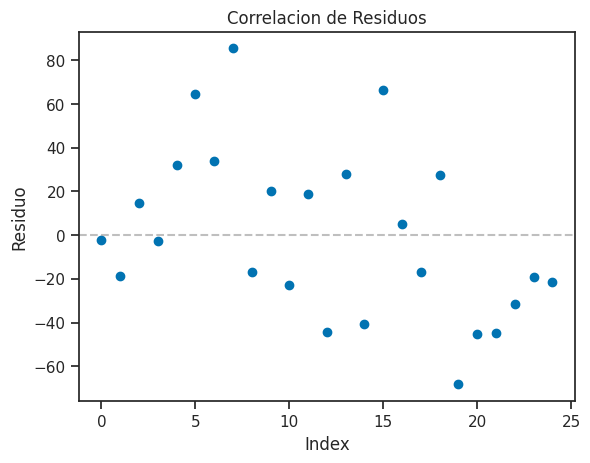

Durbin-Watson: 1.7830788132512603


In [ ]:
# Analsis grafico a mano usando Matplotlib
plt.scatter(x=dataP.index, y=model_colest.resid)
plt.xlabel( 'Index')
plt.ylabel('Residuo')
plt.title('Correlacion de Residuos')
plt.axhline(color='grey', linestyle='dashed', alpha=0.5)
plt.show()
# No se observa estructura

# Durbin-Watson Test: 2=No Correlacion (Independecia?)| 0=Correlacion Pos | 4=Correlacion Neg
print('Durbin-Watson:', sm.stats.durbin_watson(model_colest.resid)) # Sin validacion Estadistica

## 7) Transformacion Box-Cox (pendiente IC e IP)
Cuando los residuos no siguen una distribucion Normal, transformamos la y

ShapiroResult(statistic=0.9450908899307251, pvalue=0.02152523212134838)


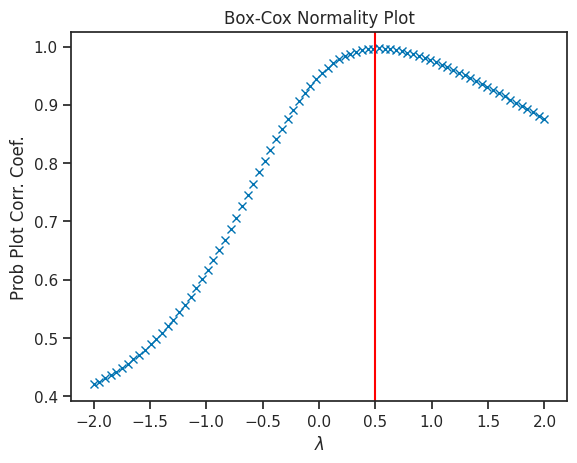

          W      pval  normal
0  0.973323  0.314302    True


In [ ]:
# Verificamos la Normalidad de los residuos
print(st.shapiro(model_cars.resid))
data = dataC
y = data['dist']

# Box-Plot Transformation - Calculo Lambda
maxlog = st.boxcox(y)[1]
st.boxcox_normplot(y, -2, 2, plt)
plt.axvline(maxlog, color='red')
plt.show()

# Transfomracion: Si Lambda  = 0 -> np.log10(y) | y**Lambda
y_trans = pd.Series(y**.5, name='y_trans')
# No olvidarse de anti-transformar para los IC(10**predicted)

# Generamos el nuevo Dataset con la y transformada
data = pd.concat([data, y_trans], axis=1)

# Generamos el nuevo modelo con la y_transformada
model_cars_trans = smf.ols('y_trans ~ speed', data=data).fit()

# Verificamos la nueva normalidad de los residuos
print(pg.normality(model_cars_trans.resid))